In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns 

In [122]:
df = pd.read_csv("CO2 Emissions_Canada.csv")
print(df.shape)
print(df.columns.tolist())
print (df[['Make', 'Engine Size(L)', 'Cylinders', 
    'Fuel Consumption Comb (L/100 km)', 
    'CO2 Emissions(g/km)']].head())
df[['Make', 'Engine Size(L)', 'Cylinders', 
    'Fuel Consumption Comb (L/100 km)', 
    'CO2 Emissions(g/km)']].describe()

(7385, 12)
['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']
    Make  Engine Size(L)  Cylinders  Fuel Consumption Comb (L/100 km)  \
0  ACURA             2.0          4                               8.5   
1  ACURA             2.4          4                               9.6   
2  ACURA             1.5          4                               5.9   
3  ACURA             3.5          6                              11.1   
4  ACURA             3.5          6                              10.6   

   CO2 Emissions(g/km)  
0                  196  
1                  221  
2                  136  
3                  255  
4                  244  


,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,10.975071,250.584699
std,1.354170,1.828307,2.892506,58.512679
min,0.900000,3.000000,4.100000,96.000000
25%,2.000000,4.000000,8.900000,208.000000
50%,3.000000,6.000000,10.600000,246.000000
75%,3.700000,6.000000,12.600000,288.000000
max,8.400000,16.000000,26.100000,522.000000


In [123]:
df.duplicated().sum()

np.int64(1103)

In [124]:
df.drop_duplicates(inplace=True)
print(df.shape)

(6282, 12)


In [125]:
df = df[['Make','Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']]

In [126]:
print(df.head())

    Make  Engine Size(L)  Cylinders  Fuel Consumption Comb (L/100 km)  \
0  ACURA             2.0          4                               8.5   
1  ACURA             2.4          4                               9.6   
2  ACURA             1.5          4                               5.9   
3  ACURA             3.5          6                              11.1   
4  ACURA             3.5          6                              10.6   

   CO2 Emissions(g/km)  
0                  196  
1                  221  
2                  136  
3                  255  
4                  244  


In [127]:
df.columns = [c.strip().replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_').replace('__','_') for c in df.columns]
print("Clean columns:", df.columns.tolist())


Clean columns: ['Make', 'Engine_SizeL', 'Cylinders', 'Fuel_Consumption_Comb_L_100_km', 'CO2_Emissionsg_km']


In [128]:
print("Missing counts per column:\n", df.isna().sum())

Missing counts per column:
 Make                              0
Engine_SizeL                      0
Cylinders                         0
Fuel_Consumption_Comb_L_100_km    0
CO2_Emissionsg_km                 0
dtype: int64


In [129]:
features = ['Engine_SizeL', 'Cylinders', 'Fuel_Consumption_Comb_L_100_km']

outlier_summary = {}

for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = outliers.shape[0]
    
    # Replace outliers with mean
    mean_value = df[col].mean()
    df.loc[df[col] < lower_bound, col] = mean_value
    df.loc[df[col] > upper_bound, col] = mean_value

# Display number of outliers found (before replacement)
outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier_Count'])
print("Outliers replaced with mean successfully!\n")
print(outlier_df)


Outliers replaced with mean successfully!

                                Outlier_Count
Engine_SizeL                              121
Cylinders                                 177
Fuel_Consumption_Comb_L_100_km            115


C:\Users\Kamil Abbas\AppData\Local\Temp\ipykernel_2252\2508517158.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.6189111747851' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower_bound, col] = mean_value


In [130]:
le = LabelEncoder()
df['Make_encoded'] = le.fit_transform(df['Make'])

In [131]:
mapping_df = pd.DataFrame({
    'Company': le.classes_,
    'Digit_Assigned': le.transform(le.classes_)
})
print(mapping_df)

          Company  Digit_Assigned
0           ACURA               0
1      ALFA ROMEO               1
2    ASTON MARTIN               2
3            AUDI               3
4         BENTLEY               4
5             BMW               5
6         BUGATTI               6
7           BUICK               7
8        CADILLAC               8
9       CHEVROLET               9
10       CHRYSLER              10
11          DODGE              11
12           FIAT              12
13           FORD              13
14        GENESIS              14
15            GMC              15
16          HONDA              16
17        HYUNDAI              17
18       INFINITI              18
19         JAGUAR              19
20           JEEP              20
21            KIA              21
22    LAMBORGHINI              22
23     LAND ROVER              23
24          LEXUS              24
25        LINCOLN              25
26       MASERATI              26
27          MAZDA              27
28  MERCEDES-B

In [132]:
features = ['Make_encoded','Engine_SizeL', 'Cylinders', 'Fuel_Consumption_Comb_L_100_km']
target = 'CO2_Emissionsg_km'


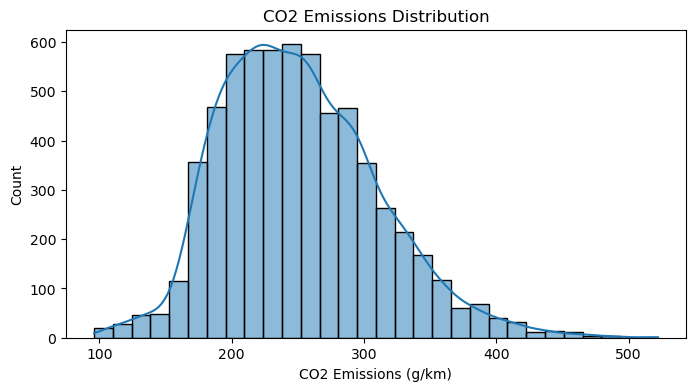

In [133]:
plt.figure(figsize=(8,4)) 
sns.histplot(df[target], bins=30, kde=True)
plt.title('CO2 Emissions Distribution') 
plt.xlabel('CO2 Emissions (g/km)') 
plt.show()

In [134]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [136]:
y_pred = model.predict(X_test)

In [137]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

R² Score: 0.779
RMSE: 28.215


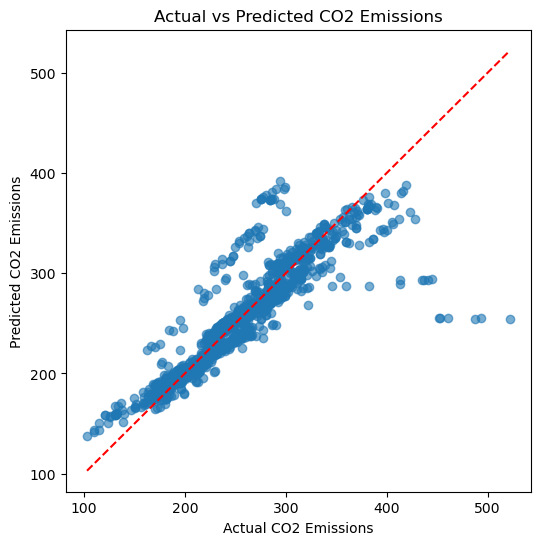

In [138]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [139]:
rf_model = RandomForestRegressor(
    n_estimators=100,      # number of trees
    random_state=42,       # for reproducibility
    n_jobs=-1              # use all CPU cores for speed
)

rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [140]:
y_pred_rf = rf_model.predict(X_test)

In [141]:
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest R² Score: {r2_rf:.3f}")
print(f"Random Forest RMSE: {rmse_rf:.3f}")

Random Forest R² Score: 0.976
Random Forest RMSE: 9.381


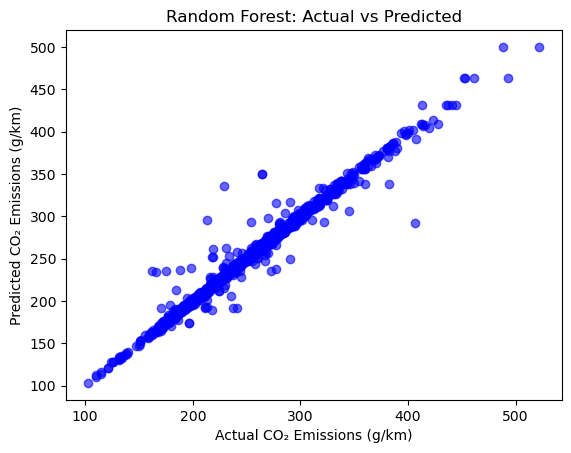

In [142]:
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.6)
plt.xlabel("Actual CO₂ Emissions (g/km)")
plt.ylabel("Predicted CO₂ Emissions (g/km)")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

In [143]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [144]:
svr = SVR(kernel='rbf', C=1000.0, epsilon=0.2, gamma='auto')  # try 'linear', 'poly' too
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

In [145]:
r2_svr = r2_score(y_test, y_pred_svr)

In [146]:
r2_svr = r2_score(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))

print(f"SVR R² Score: {r2_svr:.3f}")
print(f"SVR RMSE: {rmse_svr:.3f}")

SVR R² Score: 0.887
SVR RMSE: 20.205


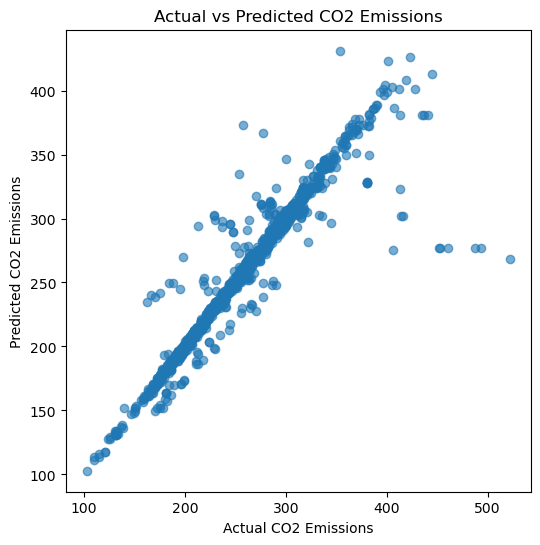

In [147]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_svr, alpha=0.6)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.show()

C:\Users\Kamil Abbas\AppData\Local\Temp\ipykernel_2252\2669052498.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=rmse_values, palette='viridis')


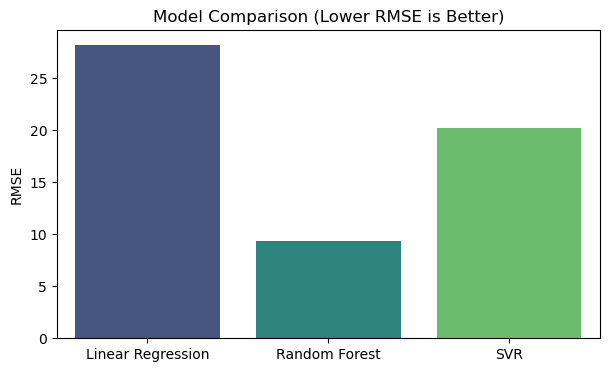

In [148]:
models = ['Linear Regression', 'Random Forest', 'SVR']
rmse_values = [rmse, rmse_rf, rmse_svr]

plt.figure(figsize=(7,4))
sns.barplot(x=models, y=rmse_values, palette='viridis')
plt.ylabel('RMSE')
plt.title('Model Comparison (Lower RMSE is Better)')
plt.show()

C:\Users\Kamil Abbas\AppData\Local\Temp\ipykernel_2252\2431617909.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_values, palette='viridis')


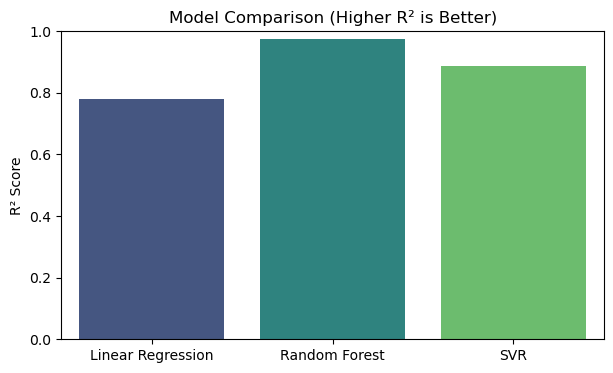

In [149]:
models = ['Linear Regression', 'Random Forest', 'SVR']
r2_values = [r2, r2_rf, r2_svr]   # assuming you already calculated these

plt.figure(figsize=(7, 4))
sns.barplot(x=models, y=r2_values, palette='viridis')
plt.ylabel('R² Score')
plt.title('Model Comparison (Higher R² is Better)')
plt.ylim(0, 1)  # optional: keeps scale between 0 and 1 for clarity
plt.show()

In [150]:
new_data = pd.DataFrame([{
    'Make_encoded': 3, #Audi
    'Engine_SizeL': 2,
    'Cylinders': 4,
    'Fuel_Consumption_Comb_L_100_km': 8.8
}]) # Actual 202g/km

In [151]:
predicted_co2 = rf_model.predict(new_data)
print(f"Predicted CO2 Emissions( Random Forest): {predicted_co2[0]:.2f} g/km")

Predicted CO2 Emissions( Random Forest): 204.87 g/km


In [152]:
predicted_co2 = model.predict(new_data)
print(f"Predicted CO2 Emissions (Linear Regression): {predicted_co2[0]:.2f} g/km")

Predicted CO2 Emissions (Linear Regression): 204.21 g/km


In [153]:
new_data_scaled = scaler.transform(new_data)

In [154]:
predicted_co2 = svr.predict(new_data_scaled)
print(f"Predicted CO2 Emissions (SVR): {predicted_co2[0]:.2f} g/km")

Predicted CO2 Emissions (SVR): 205.39 g/km
